In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from mlrose.opt_probs import TSPOpt, DiscreteOpt
from mlrose.fitness import TravellingSales, FlipFlop, FourPeaks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mlrose
from sklearn.metrics import log_loss, classification_report


In [3]:
def load_dataset(file):
    df = pd.read_csv(file)
    df['deposit'] = LabelEncoder().fit_transform(df['deposit'])
    cat_col = ['job','marital','education','default','housing','loan','contact','day','month','poutcome']
    df_matrix = df.copy()
    for col in cat_col:
        df_cat = df[col]
        df_cat_dummy = pd.get_dummies(df_cat,drop_first=True, prefix=col)
        df_matrix.drop(col,axis=1,inplace=True)
        df_matrix = pd.concat([df_matrix,df_cat_dummy],axis=1)
    num_col = ['age','balance','duration','pdays','previous','campaign']
    for col in num_col:
        df_col = df[col]
        df_matrix[col] = (df_col-df_col.min())/(df_col.max()-df_col.min())
    df_Y = df_matrix['deposit']
    df_X = df_matrix.drop('deposit',axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = load_dataset('bank.csv')

In [19]:
sa_nn = mlrose.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                          algorithm='simulated_annealing', max_iters=50000,
                          bias=True, is_classifier=True, learning_rate=0.01,
                          early_stopping=False, clip_max=1e10,
                          max_attempts=50000, random_state=10, curve=True)

In [20]:
sa_nn.fit(x_train, y_train)

NeuralNetwork(hidden_nodes=[16, 16], learning_rate=0.01, max_iters=50000)

In [21]:
print('SA training classification report = \n {}'.format(classification_report(y_train, sa_nn.predict(x_train))))

SA training classification report = 
               precision    recall  f1-score   support

           0       0.50      0.43      0.46      3956
           1       0.45      0.52      0.48      3522

    accuracy                           0.47      7478
   macro avg       0.48      0.48      0.47      7478
weighted avg       0.48      0.47      0.47      7478



In [22]:
print('SA test classification report = \n {}'.format(classification_report(y_test, sa_nn.predict(x_test))))

SA test classification report = 
               precision    recall  f1-score   support

           0       0.49      0.42      0.45      1917
           1       0.45      0.52      0.48      1767

    accuracy                           0.47      3684
   macro avg       0.47      0.47      0.47      3684
weighted avg       0.47      0.47      0.47      3684



Text(0, 0.5, 'Fitness')

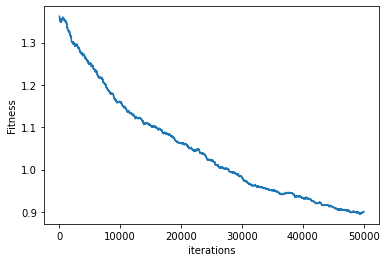

In [23]:
plt.plot(sa_nn.fitness_curve * -1)
plt.xlabel('iterations')
plt.ylabel('Fitness')